<a href="https://colab.research.google.com/github/pradeeparaja/Customer_Segmentation/blob/main/Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

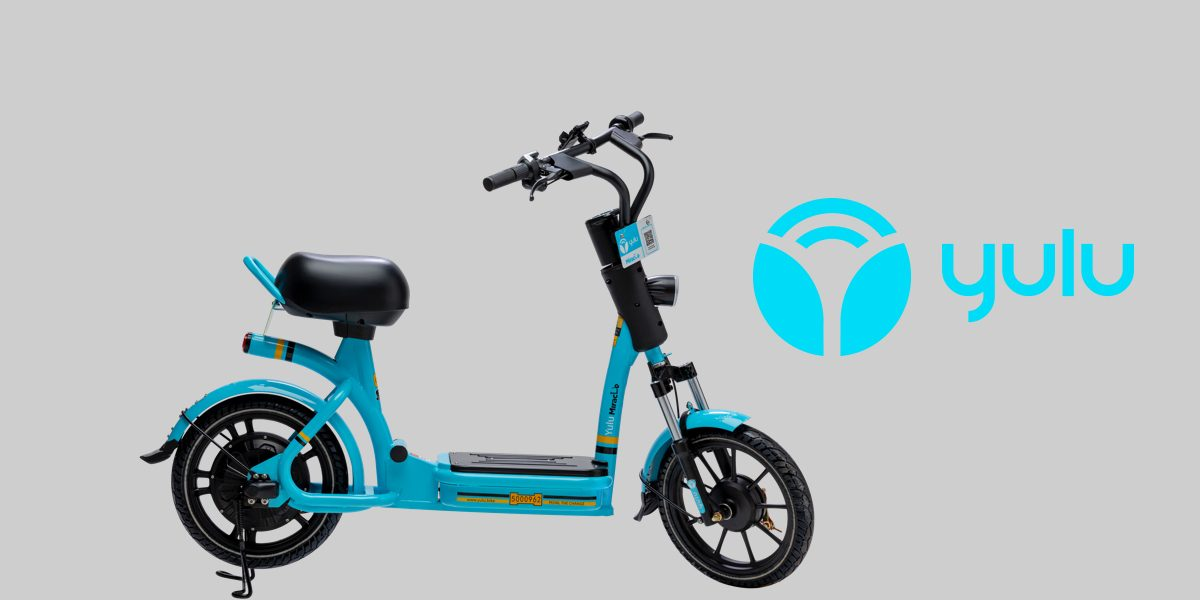

**About YULU**

Yulu, India's leading micro-mobility service provider, has been a pioneer in offering innovative commuting solutions. With a focus on reducing traffic congestion and promoting sustainable transportation, Yulu has established itself as a key player in the Indian market. However, recent challenges have led to significant dips in its revenues, prompting the company to seek insights into the factors influencing the demand for shared electric cycles.

**Background**

Yulu's mission to provide safe and convenient commuting options aligns with the growing need for sustainable transportation solutions in India. The company has strategically placed Yulu zones across various locations such as metro stations, bus stands, office spaces, and residential areas, making first and last-mile commuting smooth and affordable.

To address the decline in revenues, Yulu has partnered with a consulting firm to analyze the factors driving demand for shared electric cycles in the Indian market. This analysis aims to identify significant variables that predict electric cycle demand and assess how well these variables explain fluctuations in demand.

By delving into the data and conducting statistical analyses, Yulu aims to gain actionable insights that will guide strategic decisions and revitalization efforts to enhance its market position and meet the evolving needs of commuters across India.

**Problem Statement**

*Which variables are significant in predicting the demand for shared electric cycles in the Indian market?*

*How effectively do these variables describe the fluctuations in electric cycle demand?*

Through comprehensive data analysis and statistical techniques, Yulu aims to uncover actionable insights that will inform strategic decisions and initiatives to boost demand, improve customer engagement, and drive sustainable growth in the micro-mobility sector.

**Methodology**

1. **Data Collection**: Utilizing a dataset provided by Yulu, containing variables such as datetime, season, holiday, workingday, weather, temperature, humidity, windspeed, and counts of casual and registered users.

2. **Exploratory Data Analysis (EDA)**: Conducting EDA to understand the structure, characteristics, and distributions of the dataset. This included
- checking data types,
- handling missing values,
- converting categorical attributes,
- analyzing numerical and categorical variables' distributions.

3. **Statistical Analysis**: Employing statistical tests such as
- 2-Sample t-test,
- ANOVA,
- Chi-square,
- Shapiro-Wilk test to investigate relationships between variables, test hypotheses, and assess data assumptions (normality, equal variance).

4. **Visualization Techniques**: Using visualizations such as
- histograms,
- bar plots,
- box plots,
- scatter plots,
- heatmaps to visualize data distributions, relationships, and patterns.

**Column Profiling**

*  datetime: datetime
*  season: season (1: spring, 2: summer, 3: fall, 4: winter)
*  holiday: whether day is a holiday or not
*  workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
*  weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  temp: temperature in Celsius
*  atemp: feeling temperature in Celsius
*  humidity: humidity
*  windspeed: wind speed
*  casual: count of casual users
*  registered: count of registered users
*  count: count of total rental bikes including both casual and registered



In [1]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import kruskal
from scipy.stats import chi2_contingency

In [6]:
df = pd.read_csv('/content/bike_sharing.csv')

### **Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis.**

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.shape

(10886, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [12]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

### **Data types convertion**

Converting the datetime column into datatime data type
Converting the Season, weather, holiday and workingday columns into categoty

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])

category_cols = ['season' , 'weather' , 'holiday' , 'workingday']
df[category_cols] = df[category_cols].astype('category')

In [14]:
df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [15]:
df.duplicated().sum()

0

There is no duplicated value in the dataset



###**Analyze the distribution of Numerical & Categorical variables, separately**

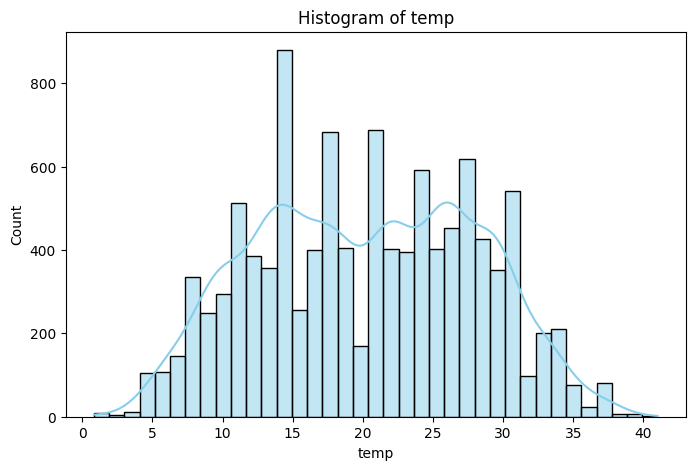

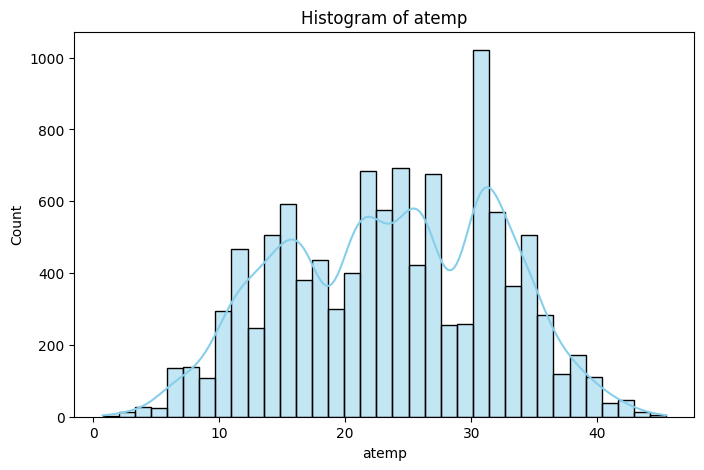

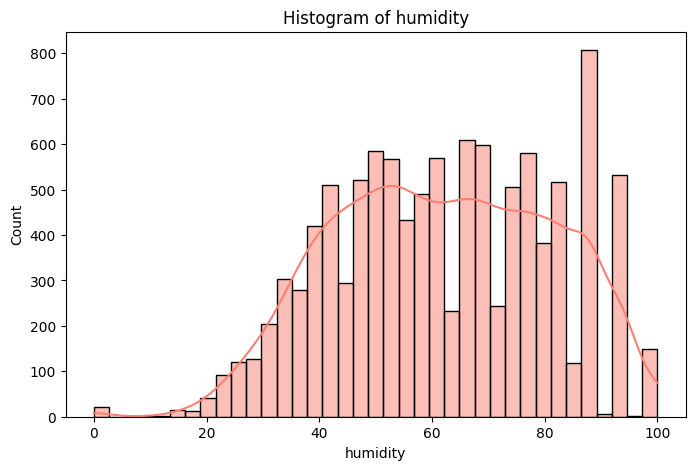

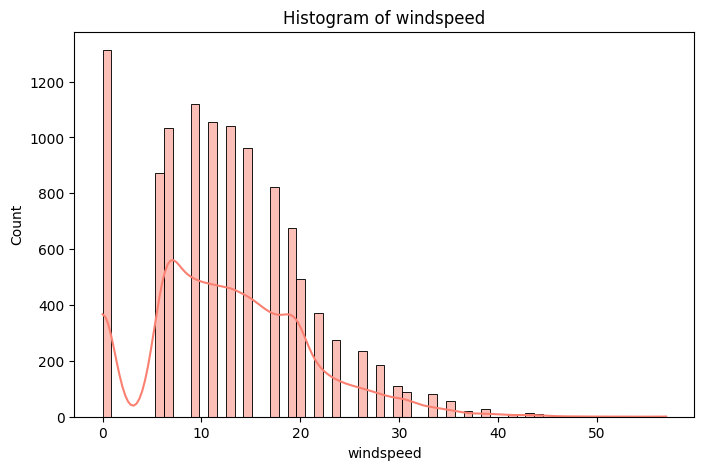

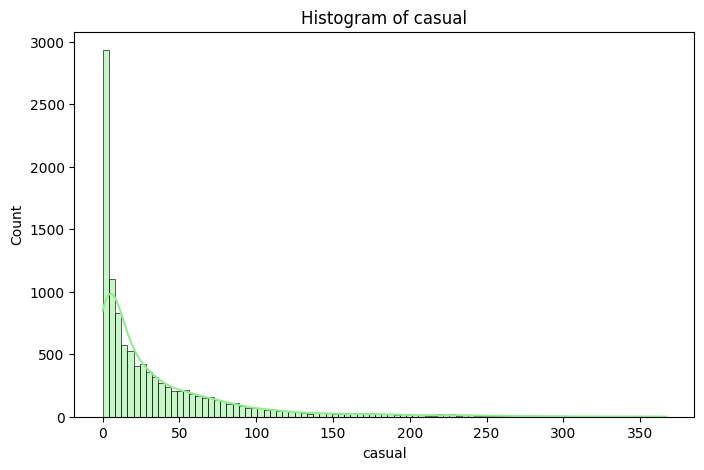

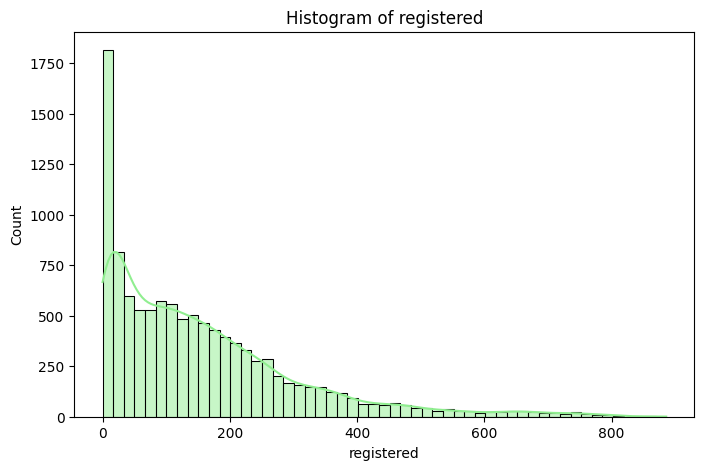

<Figure size 800x500 with 0 Axes>

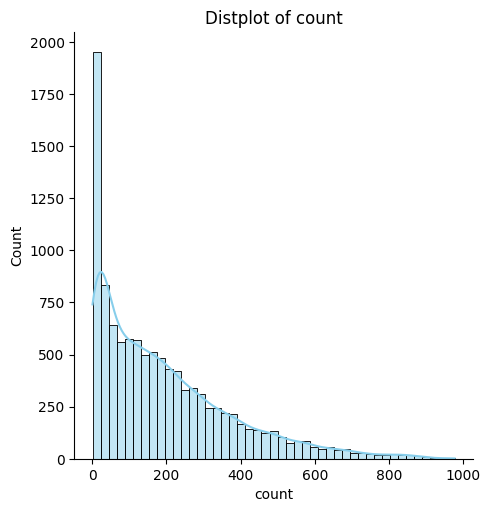

In [16]:
# Analyze the distribution of Numerical variables
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
for col in numerical_cols:
  plt.figure(figsize=(8, 5))
  if col in ['temp' , 'atemp']:
      sns.histplot(df[col], kde=True, color='skyblue', edgecolor='black')
      plt.title(f'Histogram of {col}')

  elif col in ['humidity', 'windspeed']:
        sns.histplot(df[col], kde=True, color='salmon', edgecolor='black')
        plt.title(f'Histogram of {col}')
  elif col in ['casual', 'registered']:
        sns.histplot(df[col], kde=True, color='lightgreen', edgecolor='black')
        plt.title(f'Histogram of {col}')
  else:
        sns.displot(data=df, x=col, kde=True, color='skyblue', edgecolor='black')
        plt.title(f'Distplot of {col}')





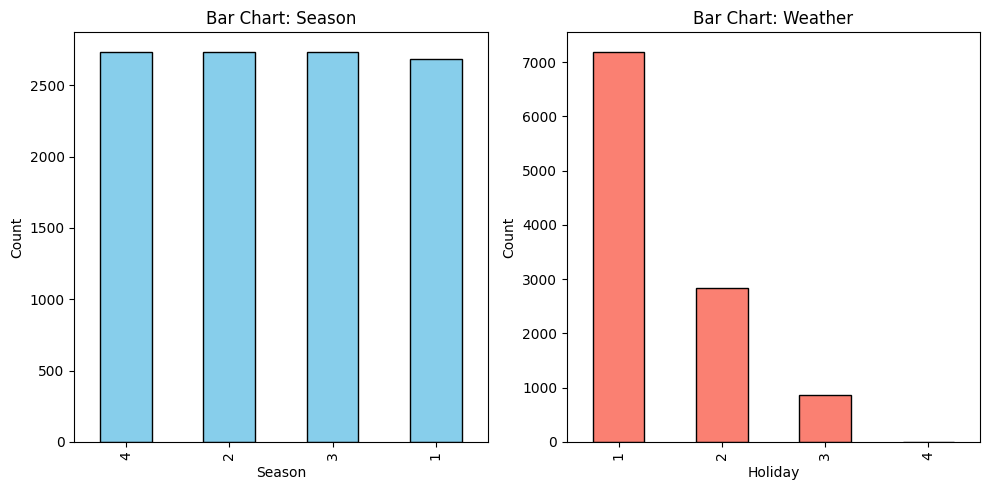

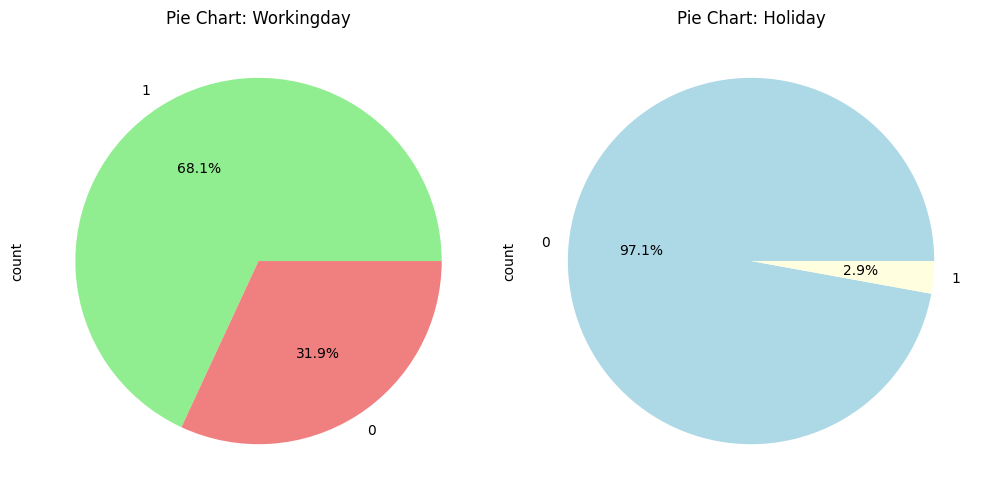

In [17]:

categorical_cols = ['season', 'holiday', 'workingday', 'weather']

# Create bar charts for 'season' and 'holiday'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['season'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart: Season')
plt.xlabel('Season')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
df['weather'].value_counts().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Bar Chart: Weather')
plt.xlabel('Holiday')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Create pie charts for 'workingday' and 'weather'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['workingday'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Pie Chart: Workingday')

plt.subplot(1, 2, 2)
df['holiday'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightyellow', 'lightgrey'])
plt.title('Pie Chart: Holiday')

plt.tight_layout()
plt.show()


###**Bivariant analysis**

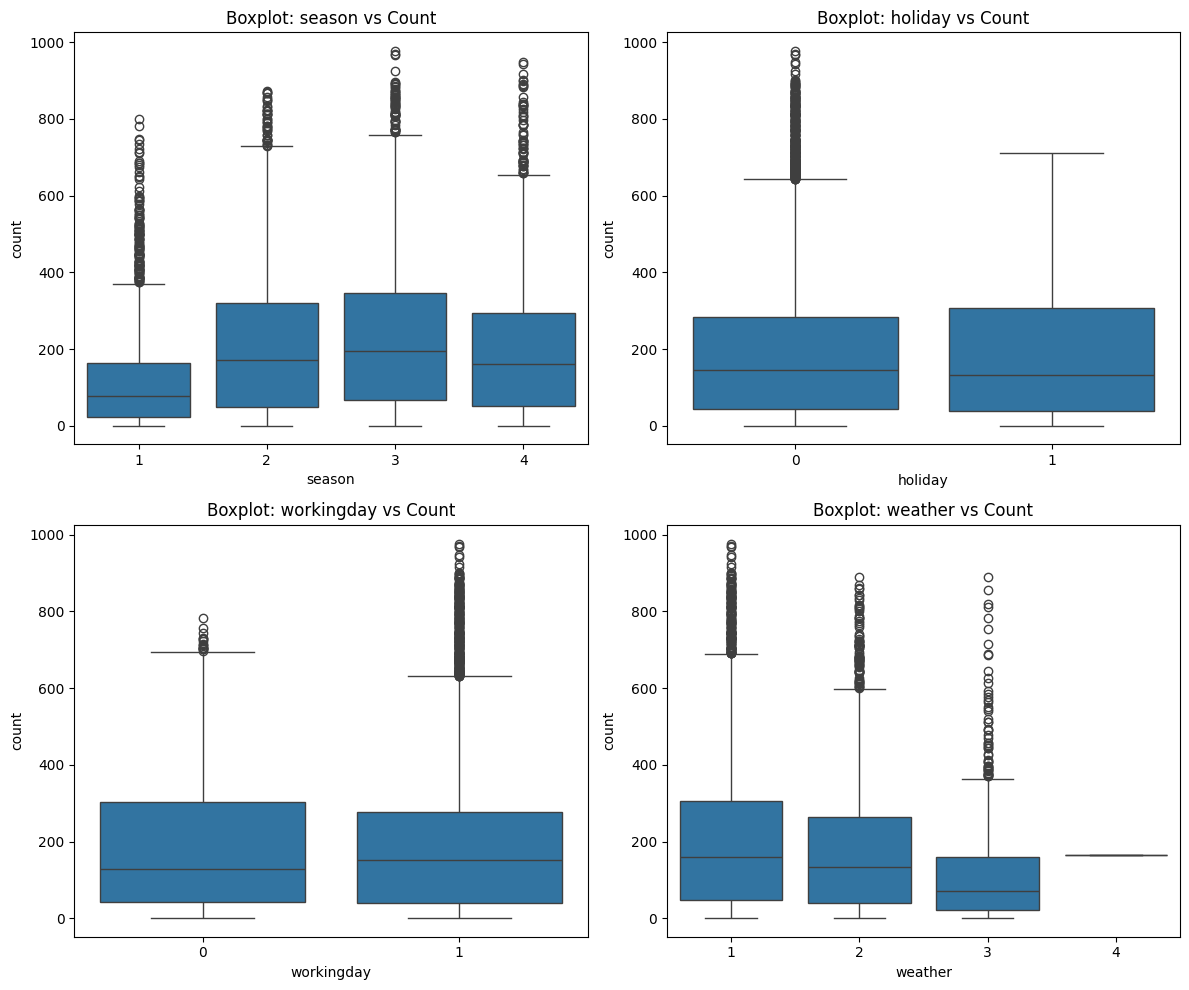

In [18]:
cat_cols = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot: {cat_cols[index]} vs Count')
        index += 1

plt.tight_layout()
plt.show()

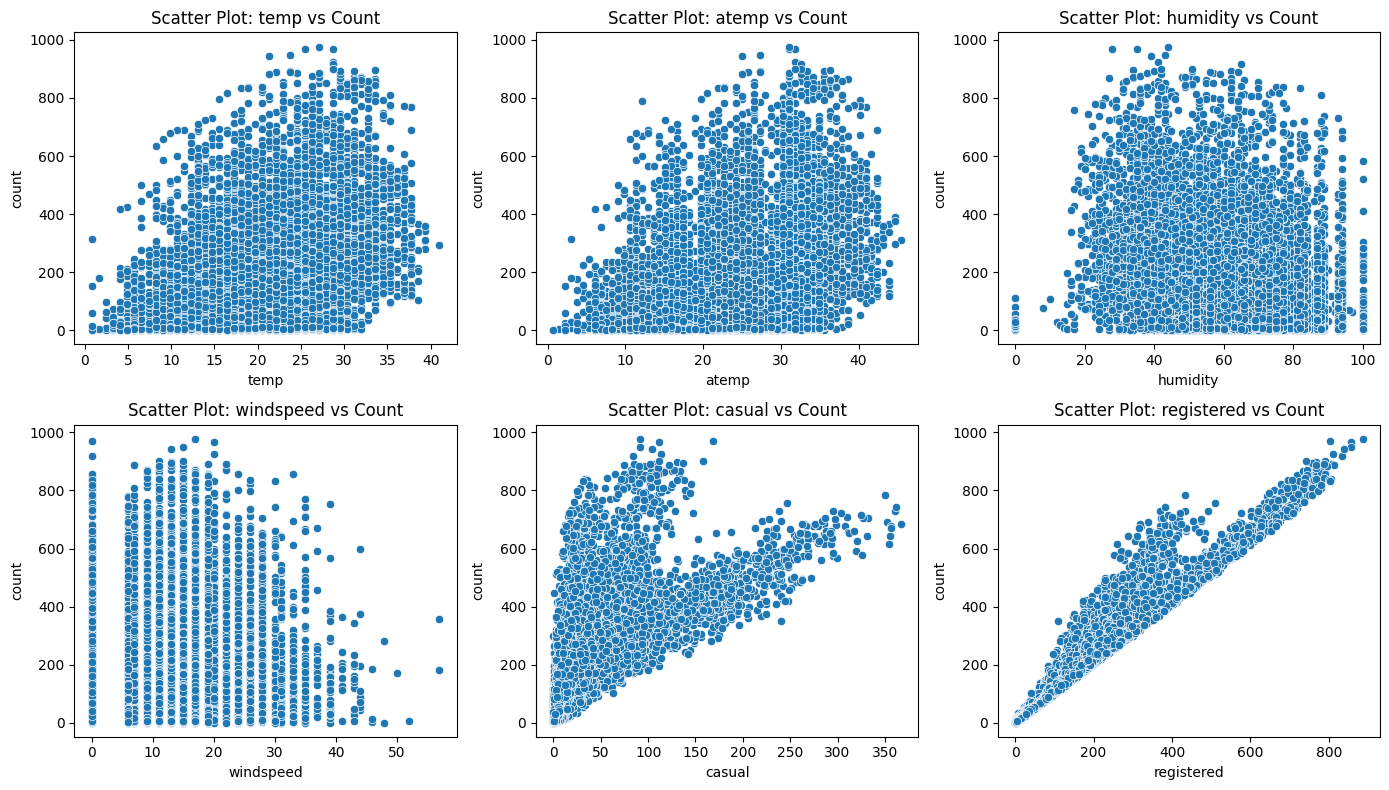

In [19]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axes[row, col])
        axes[row, col].set_title(f'Scatter Plot: {num_cols[index]} vs Count')
        index += 1

plt.tight_layout()
plt.show()

###**Outlier detection and cliping**

Text(0.5, 1.0, 'box plot before removing outlier')

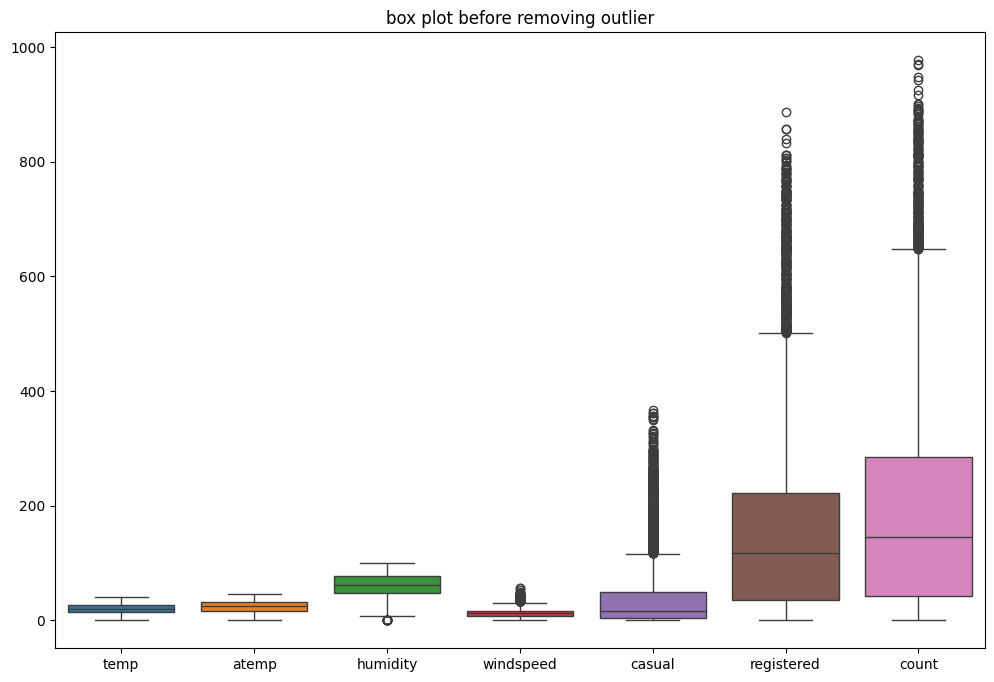

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title('box plot before removing outlier')

In [21]:
numerical_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

**Using IQR Method to Identify the Outlier and np.clip to clip the outlier**

In [22]:
for cols in numerical_cols:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  IQR = Q3 - Q1
  Lower_fence = Q1 - 1.5*IQR
  Upper_fence = Q3 + 1.5*IQR
  outliers = ((df[cols] < Lower_fence) | (df[cols] > Upper_fence))
  df[cols] = np.clip(df[cols] , Lower_fence , Upper_fence)

**box plot after removing outlier**

Text(0.5, 1.0, 'box plot after removing Outlier')

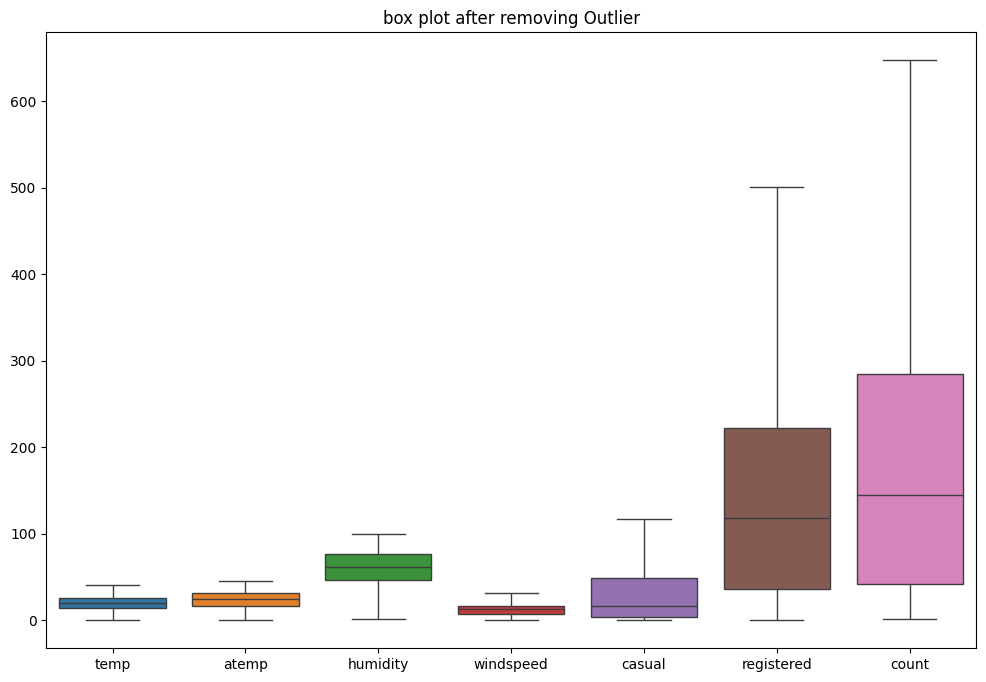

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df)
plt.title('box plot after removing Outlier')

<Axes: >

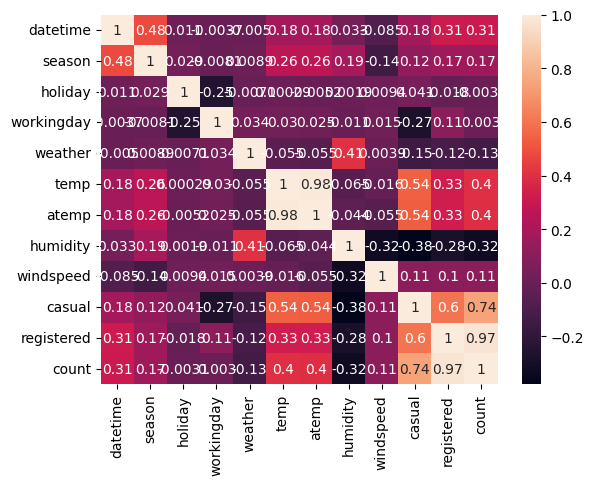

In [24]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix , annot = True)

# Hypothesis Testing

###**Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

In [25]:
weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['holiday'] == 0]['count']

ttest_ind -> becase we are comparing two independent group

Formulate Null and Alternative:
1. H0: There is a significant diffrence in the number of rides between weekdays and weekends
2. H1: There is no significant diffrence in the number of rides between weekdays and weekends

In [26]:
t_stats , p_value = stats.ttest_ind(weekday_rides , weekend_rides)
alpha = 0.05
print("T-statistics :" ,t_stats)
print('P-value :' ,  p_value)
if p_value <= alpha:
  print('Reject Null Hypothesis')
  print('There is a significant diffrence in the number of rides between weekdays and weekends')
else:
  print('Fail to reject null')
  print('There is no significant diffrence in the number of rides between weekdays and weekends')

T-statistics : 0.10169966390389935
P-value : 0.9189962026581712
Fail to reject null
There is no significant diffrence in the number of rides between weekdays and weekends


### **Check if the demand of bicycles on rent is the same for different Weather conditions?**

Assumptions of the test

1. Normallity check

In [27]:
stat, p_value = shapiro(df['count'])
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 0.8877866268157959, p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


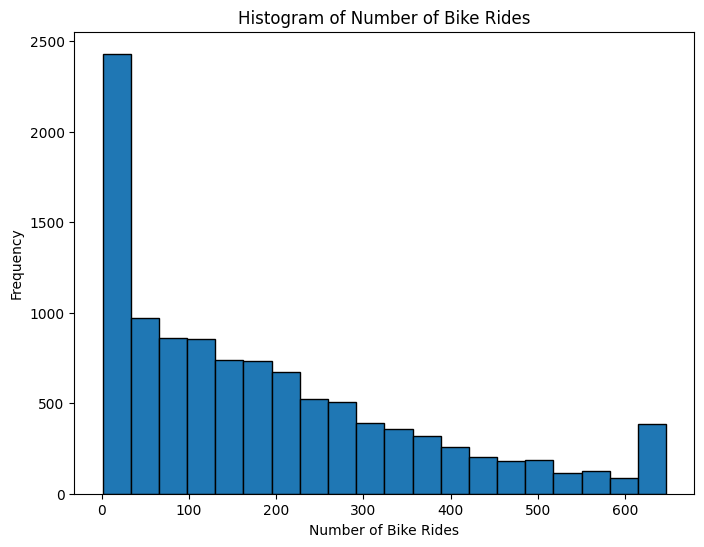

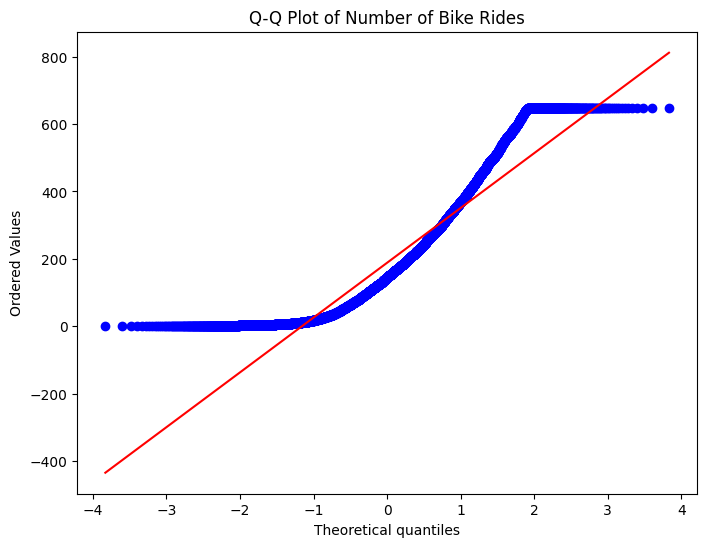

In [28]:
# Histogram of 'count' variable
plt.figure(figsize=(8, 6))
plt.hist(df['count'], bins=20, edgecolor='black')
plt.xlabel('Number of Bike Rides')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bike Rides')
plt.show()

# Q-Q plot of 'count' variable
plt.figure(figsize=(8, 6))
stats.probplot(df['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Number of Bike Rides')
plt.show()


Equality of Variance Assumption


In [29]:
from scipy.stats import levene

# Levene's test for equality of variance
stat, p_value = levene(df['count'][df['weather'] == 1],
                        df['count'][df['weather'] == 2],
                        df['count'][df['weather'] == 3],
                        df['count'][df['weather'] == 4])
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")

if p_value <= 0.05:
  print('Reject Null Hypothesis')
  print('Variance are not equal')
else:
  print('Fail to reject null')
  print('Variance are equal')


Levene's Test - Statistic: 59.78620431801216, p-value: 2.499984328437755e-38
Reject Null Hypothesis
Variance are not equal



*Since the dataset does not meet the assumptions required for ANOVA, such as normality and homogeneity of variances, we need to use a non-parametric alternative. One such alternative is the Kruskal-Wallis test, which is a non-parametric version of ANOVA and is suitable for comparing groups when the assumptions of ANOVA are not met.*





Formulate Null and Alternative:
1. H0: The demand of bicyle on rent is the same across diffrent weather conditions
2. H1: The demand for bicycles on rent varies significantly across different weather conditions.

In [30]:

weather_groups = []
for weather_condition in df['weather'].unique():
    weather_groups.append(df[df['weather'] == weather_condition]['count'])

stat, p_value = kruskal(*weather_groups)
print(f"Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis Test - Statistic: 205.04853208154285, p-value: 3.421748763291878e-44


In [31]:
alpha = 0.05

if p_value <= alpha:
    print("Reject the null hypothesis: There are significant differences in demand for bicycles across different weather conditions.")
else:
    print("Fail to  reject the null hypothesis: There is no significant difference in demand for bicycles across different weather conditions.")


Reject the null hypothesis: There are significant differences in demand for bicycles across different weather conditions.


### **Check if the demand of bicycles on rent is the same for different Seasons?**

Check Assumptions for Anova

**shapiro Test**

In [32]:
stat, p_value = shapiro(df['count'])
print(f"Statistic: {stat}, p-value: {p_value}")

Statistic: 0.8877866268157959, p-value: 0.0


**levene`s Test**

In [33]:
stat, p_value = levene(df['count'][df['season'] == 1],
                        df['count'][df['season'] == 2],
                        df['count'][df['season'] == 3],
                        df['count'][df['season'] == 4])
print(f"Levene's Test - Statistic: {stat}, p-value: {p_value}")


Levene's Test - Statistic: 199.5119672794296, p-value: 5.7233179707619984e-126


Formluate the Null and Alternatice:
1. H0: The demand for bicycle on rent is the same across diffrent seasons.
2. H1: The demand for bicycles on rent varies significantly across different seasons.

**kruskal Test**

In [34]:

season_groups = []
for season in df['season'].unique():
    season_groups.append(df[df['season'] == season]['count'])

stat, p_value = kruskal(*season_groups)
print(f"Kruskal-Wallis Test - Statistic: {stat}, p-value: {p_value}")


Kruskal-Wallis Test - Statistic: 699.2817665514561, p-value: 3.0045514163996123e-151


In [35]:
if p_value <= 0.05:
    print("Reject the null hypothesis: The demand for bicycle on rent is the same across diffrent seasons.")
else:
    print("Fail to reject the null hypothesis: The demand for bicycles on rent varies significantly across different seasons.")

Reject the null hypothesis: The demand for bicycle on rent is the same across diffrent seasons.


### **Check if the Weather conditions are significantly different during different Seasons?**

**Chi-Square Test**

Since we are comparing two categorical variables, weather and season, both of which represent different categories or levels, the appropriate statistical test to determine if there is a significant association between them is the Chi-Square test.

Formluate the Null and Alternatice:
1. H0: The distribution of weather conditions is the same across different seasons.
2. H1: The distribution of weather conditions is different across different seasons.

In [36]:
contingency_table = pd.crosstab(df['season'], df['weather'])
print(contingency_table)

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [37]:

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square Test - Chi2 Statistic: {chi2_stat}, p-value: {p_value}")


Chi-square Test - Chi2 Statistic: 49.158655596893624, p-value: 1.549925073686492e-07


In [38]:
if p_value <= 0.05:
    print("Reject the null hypothesis: The distribution of weather conditions is the same across different seasons.")
else:
    print("Fail to reject the null hypothesis: The distribution of weather conditions is different across different seasons.")

Reject the null hypothesis: The distribution of weather conditions is the same across different seasons.


## **Insights**

1. **Weather Conditions and Demand**: The Kruskal-Wallis test revealed a significant difference in the demand for bicycles across different weather conditions. This suggests that weather plays a crucial role in determining the demand for shared electric cycles. Further analysis can delve into specific weather patterns or conditions that most impact demand.

2. **Seasonal Variations**: The Kruskal-Wallis test also indicated a significant variation in bicycle rental demand across different seasons. This implies that seasonal factors such as weather changes, holidays, or cultural events may influence people's preferences for using shared electric cycles.

3. **Association between Weather and Season**: The Chi-Square test showed that the distribution of weather conditions is different across different seasons. This finding suggests a potential relationship between weather patterns and seasonal changes, which could further affect the demand for shared electric cycles.

## **Recommandations**

1. **Weather-Based Marketing Strategies**: Yulu can develop targeted marketing campaigns or promotions based on weather forecasts. For instance, offering discounts during rainy seasons or promoting rides on clear days can attract more users.
2. **Seasonal Promotions**: Implementing seasonal promotions or customized services based on seasonal demand fluctuations can help Yulu optimize its resources and cater to varying customer preferences throughout the year.
3. **Weather-Adaptive Pricing**: Consider implementing dynamic pricing strategies based on weather conditions. For example, adjusting rental prices during extreme weather conditions or peak seasons can align with demand and maximize revenue.
4. **Diversify Offerings**: Explore introducing additional features or services during specific weather conditions or seasons. For instance, providing rain gear or offering guided tours during favorable weather can enhance customer experience and encourage usage.

## **Conclusion**

In conclusion, the analysis highlights the significant impact of weather and seasonal variations on the demand for shared electric cycles. By leveraging these insights, Yulu can refine its operational strategies, marketing efforts, and service offerings to better meet customer needs, improve user experience, and drive sustainable growth in the micro-mobility sector. Continual monitoring of weather trends and seasonal demand patterns coupled with data-driven decision-making will be crucial for Yulu's long-term success in the Indian market.






